In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
import warnings
warnings.filterwarnings("ignore")

import arcgis
from arcgis.gis import GIS
from arcgis import geometry
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.features import summarize_data
from arcgis.features.use_proximity import create_buffers
from arcgis.features.manage_data import dissolve_boundaries
import pandas as pd
import getpass


username=input("Enter Username:")
password = getpass.getpass("Enter Password:")
gis= GIS(username=username, password=password)

arcgis.__version__

Enter Username:dsc170wi23_38
Enter Password:········


'2.1.0.2'

# **Part 1**: Analyzing Factors of Airbnb Pricing in San Diego

# Part 2: Team members:
* **Tyson Tran**, A16123769
* **Benson Duong**, A15785785

# Part 3: Question(s) you addressed, why it is important
## Question: What spatial and non-spatial factors are most likely to influence the listings price of an Airbnb?
### Why it's important?
* This analysis is intended for people interested in real estate investing and more specifically in getting into short-term rentals such as Airbnb. With the boom in demand for short-term rentals, it is important to address the question that we pose for our analysis because it will help investors gain insight on ideal areas that they should be looking at where their money would be able to grow and provide returns on investment. In return for investors being able to identify areas to invest their money, the local economy of San Diego will grow with money being spent in the community. With the individuals staying in areas that locals would stay instead of hotel districts, they are more likely to take advantage of local dining over areas that are designed for tourist. Also, many Airbnb host are mom-and-pop landlords from the area, so the money spent on accomodations will also flow into the area.

* While our business case is specifically geared towards investors, we believe that there can be many other uses for it such as for local long term rentals. It can be used to help renters identify areas that fit their criteria of what factors they are looking for in an area and if it can be done with the price range they are looking it. It can also be used to help investors in other forms of real-estate investing (long-term rentals, commercial real estate) in a similar way that it would help Airbnb investors identify areas to invest their money.

# Part 4: Background and Literature

## Background and Literature
**Background:**  
* Airbnb is a form of real estate investing that is focused on short-term stays similar to hotels. This type of investing has grown exponentially over the past few years with people looking to travel but didn’t want to be close to others with the unknowns of Covid-19 floating around. As an investor, the goal is to make a profit on the money that they had to invest from their own pocket. It is crucial to understand the most important factors of a pricing strategy to optimize pricing for existing properties or to identify properties that could be used as an Airbnb investment.

**Literature:**  
* https://www.tandfonline.com/doi/full/10.1080/1331677X.2021.1962380:  
    * In this paper called “Analysis of price determinants in the case of Airbnb listings” by Valentin Toader, they look at the influence of different factors on the average daily rate. They found that professional host calculates the price based on the listing characteristics plus a premium for their involvement while other host charges just based on the listing characteristics. They also found that the premium charge for the location only matters for experienced owners. The last surprising find that they had was the listings’ reputation had a negative impact on price, so the more reputable that they were, the less that they were able to charge. It is possible that this could be due to many reviews on the experience, so the possible consumers have a great feel for the experience already and might not find it worth it for a higher price over the properties that they do not know what to expect.

* https://frw.studenttheses.ub.rug.nl/3433/1/JeroenSchulte_Masterthesis_Final.pdf:  
    * In this paper called “Understanding the value of location in the Airbnb market” by Jeroen Schulte, he looks at how the location to attractive touristic areas affects the pricing of an Airbnb in Rome. The main finding of this paper is that the pricing does reflect in the Airbnb listing price up to 5 Kilometers away from the nearest attractive tourist destination, but the magnitude diminishes the further away it gets from the destination.

* https://padlifter.com/free-tips-and-resources/pricing/a-step-by-step-guide-to-pricing-your-place-on-airbnb/:  
    * In this online article from Padlifter about creating a pricing strategy, they focus on creating a pricing strategy based on demand and the features of the home. This means that they are not charging directly for the location that they are staying in but are charging it if people are looking to stay in the area for some reason.

* https://hosttools.com/blog/short-term-rental-tips/airbnb-pricing-strategies/:  
    * In this online article from Host Tools also about creating a price strategy, their approach is to look at expenses and look for comparables to price the home. This more directly relates to the normal way an investor charges rent because they are making sure that they are not losing money by the expenses not being covered in the first place.

**Hypothesis:**  
With the knowledge from these literature pieces, we believe that the biggest influencing factors are going to be location and size of the home that affects the listings price for the most part. The one exception are for Airbnbs that are treated as an experience over a place to stay.


# Part 5: Python packages you used and why

* The list of Python Packages that we've used are as follows. They are accompanied with a description and their purposes of use in the context of our project.
* **arcgis**: for geospatial data operations, including making map visualizations, reading and writing geo-data onto ArcGIS online, and performing geospatial data cleaning operations. Sub-modules used include arcgis.geoenrichment for geoenriching the data, and arcgis.features for  GeoAccessor, GeoSeriesAccessor or general geographic data cleaning operations such as summarize_data.aggregate_points, .use_proximity.create_buffers, manage_data.dissolve_boundaries
* **os**: for file-reading and file-writing
* **tqdm**: to monitor the completion of long for-loops with a visual progress bar, especially during the geo-enrichment.
* **sklearn**: for machine learning operations, including building the prediction model to predict airbnb pricing.
* **pandas**: for DataFrame operations. While the arcgis and its associated sub-module already have a 'spatially enabled DataFrame', the pandas DataFrame will be used for the initial loading of the airbnb data, which exists purely as a raw csv. 
* **numpy**: for matrix operations
* **matplotlib**: for data visualization of regular, non-spatial graphs.
* **seaborn**: for data visualization of regular, non-spatial graphs.


# Part 6: Data sources
Data Sources for this project are as follows:
* **San Diego Airbnb Data**:
    * URL: http://insideairbnb.com/get-the-data/
    * Description: Points Layer Shapefile of Airbnb locations in City of San Diego
* **North American Tourist Attractions Shapefile**:
    * URL: https://openstreetmap.maps.arcgis.com/home/item.html?id=addaa517dde346d1898c614fa91fd032
    * Description: Points Layer Shapefile of Tourist Attractions in North America
* **San Diego County Zipcode Shapefile**:
    * URL: https://services1.arcgis.com/eGSDp8lpKe5izqVc/arcgis/rest/services/Zip_Code_San_Diego_County/FeatureServer
    * Description: AGOL Feature Layer of Polygons for zipcode tabulation areas in County of San Diego.
    * This was **not** data we originally planned on using, but realized it was necessary upon discovering the inadequacies of the tourist attractions dataset.
* **Geo-enrichment**:
    * In this case, geo-enrichment was done on San Diego County Zipcodes, using the USA data collections already provided by arcgis, through **arcgis.geoenrichment.Country.get('US').data_collections**, and here, the following data collections and their specific analysis variables were used:
        * businesses
            * businesses.S01_BUS - 2022 Total Businesses (SIC)
            * businesses.S16_BUS - 2022 Eating & Drinking Businesses (SIC)
            * businesses.S24_BUS - 2022 Hotel/Lodging Businesses (SIC)
            * businesses.S26_BUS - 2022 Movie/Amusement Businesses (SIC)
            * businesses.N01_BUS - 2022 Total Businesses (NAICS)
            * businesses.N13_BUS - 2022 Food & Beverage Stores Bus (NAICS)
            * businesses.N15_BUS - 2022 Gas Stations - Businesses (NAICS)
            * businesses.N16_BUS - 2022 Clothing/Accessory Businesses (NAICS)
            * businesses.N34_BUS - 2022 Arts/Entertainment/Rec Bus (NAICS)
            * businesses.N35_BUS - 2022 Accommodation/Food Service Bus (NAICS)
            * businesses.N36_BUS - 2022 Accommodation Businesses (NAICS)
            * businesses.N37_BUS - 2022 Food Service/Drinking Estab Bus (NAICS)
        * industry:
            * industry.EMP_CY	 - 2022 Employed Civilian Pop 16+	
            * industry.INDARTS_CY - 2022 Industry: Arts/Entertainment/Rec	
            * industry.INDFOOD_CY - 2022 Industry: Accommodation/Food Svcs
        * crime
        * presenceofchildren
            * presenceofchildren.HU18HWF10 - 2010 HHs w/Pop <18: HW Fam
            * presenceofchildren.HWFU6O10 - 2010 Husband-wife Fam: Own Kids <6	
        * homevalue
            * homevalue.MEDVAL_CY - 2022 Median Home Value
            * homevalue.AVGVAL_CY - 2022 Average Home Value
            * homevalue.MEDVAL_FY - 2027 Median Home Value	
            * homevalue.AVGVAL_FY - 2027 Average Home Value
            * homevalue.ACSMEDVAL - 2021 Median Home Value (ACS 5-Yr)
            * homevalue.ACSAVGVAL - 2021 Average Home Value (ACS 5-Yr)
        * householdincome
            * householdincome.MEDHINC_CY - 2022 Median Household Income
            * householdincome.AVGHINC_CY - 2022 Average Household Income
            * householdincome.PCI_CY - 2022 Per Capita Income
            * householdincome.MHIGRWCYFY - 2022-2027 Growth Rate: Median HH Inc
            * householdincome.ACSAVGHINC - 2021 Median HH Income (ACS 5-Yr)
        * disposableincome
            * disposableincome.MEDDI_CY	- 2022 Median Disposable Income	
            * disposableincome.AVGDI_CY	- 2022 Average Disposable Income
        * population
            * population.ACSTOTPOP - 2021 Total Population (ACS 5-Yr)

# Part 7. Data cleaning you have done 
* Data Cleaning Operations we have done:
    * Reading the airbnb data in its original, raw, csv form
    * We realized we needed to clean the price column in the original airbnb csv data to make it numerical (removal of string dollar signs and string decimal commas)
    * We realized we needed to clean the host acceptance rate column in the original airbnb csv data to make it numerical (removal of string percentage symbol)
    * Converting the airbnb csv data into a spatially enabled dataframe, then publishing it as a feature layer
    * Reading the (already-existing) North American Tourist Attractions feature layer
    * Reading the (already-existing) San Diego County Zipcodes feature layer
    * Spatially joining the North American Tourist Attractions data with the San Diego County Zipcodes data, producing a new dataset with the tourist attractions only filtered to those inside SD county.
    * Geo-enriching the San Diego County Zipcodes in a long for-loop (upto 36 minutes long, monitored by a tqdm progress bar) in terms of the data collections and analysis variables stated previously. The result would be saved as a csv that will be immediately file-read rather than redo the for loop in future executions of the notebook.
    * Geo-enriching the San Diego County Zipcodes by applying aggregate_points in terms of the airbnb feature layer made from before, aggregated in terms of numerical columns from the airbnb feature layer such as price, host acceptance rate, etc.
    * We decided to add even more self-derived columns to the geo-enriched San Diego County Zipcodes data, namely getting certain numerical columns and log-transforming them, or re-normalizing them in terms of zipcode population or zipcode area. Specifically, all of the numerical columns of the geo-enriched San Diego Zipcodes data had a log-transformed version for them added. The numerical columns that were chosen to have another version normalized by population added to the dataset were those that were found to have an absolute correlation coefficient with the population column above 50%. We also made new columns showing income growth rate or home value growth rate, and income inequality.
    * Now, there are 2 final, possible datasets that could be done: 
         * a dataset along the row-schema of zipcodes (i.e. each row is a unique zipcode and its geo-enriched features); A prediction model using a dataset like this would be about predicting a zipcode's average airbnb price based on geo-enriched zipcode data.
         * or a dataset along the row-schema of airbnb's (i.e. each row is a unique airbnb listing), in which case, the airbnb feature layer would have to be joined with the geo-enriched San Diego Zipcodes data. A prediction model using a dataset like this would be about predicting the airbnb price, based on info about the airbnb itself as well as columns about geo-enriched info about the zipcode it belongs to.
    * We decided to go with the latter, since it would be allow a higher row count suitable for training

In [3]:
first_time = False
if first_time == True:
    listings_orig_df = pd.read_csv('listings.csv.gz', compression='gzip')

    # data cleaning some columns so that they are all numerical
    price_column = listings_orig_df["price"].str.replace("$","").str.replace(",","").astype(float)
    listings_orig_df["price"] = price_column

    host_acceptance_rate_column = (listings_orig_df["host_acceptance_rate"]
                                   .str.replace(" ","0")
                                   .str.replace("%","").astype(float)
                                  )
    listings_orig_df["host_acceptance_rate"] = host_acceptance_rate_column

    # 
    longitude_column_name = "longitude"
    latitude_column_name = "latitude"
    x_coord_column_name = "x_coord"
    y_coord_column_name = "y_coord"

    listings_orig_df[x_coord_column_name] = listings_orig_df[longitude_column_name]
    listings_orig_df[y_coord_column_name] = listings_orig_df[latitude_column_name]

    listings_orig_sedf = pd.DataFrame.spatial.from_xy(listings_orig_df,
                                                      x_column = x_coord_column_name, 
                                                      y_column=y_coord_column_name)

    print(listings_orig_sedf.shape)
    listings_orig_item = listings_orig_sedf.spatial.to_featurelayer("airbnb_listings_ttbd_v3",gis=gis)
    listings_orig_item.share(org=True)
    print(listings_orig_item.id)
else:
    listings_orig_item = gis.content.get('6ee60713130546139ebcb982322faa59')

listings_orig_flayer = listings_orig_item.layers[0]
listings_fset = listings_orig_flayer.query()
listings_sdef = listings_fset.sdf 
assert listings_fset.spatial_reference["latestWkid"] == 3857

# reducing and data cleaning the listings sdef into a new feature layer called temp_listings
selected_listings_column_names = ["id"]
selected_listings_column_names += ["host_accep"] # host_acceptance rate
selected_listings_column_names += ["host_total"] # host_total_listings_count
selected_listings_column_names += ["accommodat"] # accommodates
selected_listings_column_names += ["price"] # price
selected_listings_column_names += ["reviews_pe"] # reviews_per_month
selected_listings_column_names += ["number_of_"] # number of reviews
selected_listings_column_names += ["review_sco"] # review score
selected_listings_column_names += ["review_s_1"] # review_scores_accuracy
selected_listings_column_names += ["review_s_2"] # review_scores_cleanliness
selected_listings_column_names += ["review_s_3"] # review_scores_checkin
selected_listings_column_names += ["review_s_4"] # review_scores_communication
selected_listings_column_names += ["review_s_5"] # review_scores_location
selected_listings_column_names += ["review_s_6"] # review_scores_value

# reduce the columns 
temp_listings_sdef = listings_sdef[selected_listings_column_names]

* We will read in a data source about Tourist Attractions in North America, provided by Professor Zaslavsky
* However, the dataset is large and takes a long time to read in
* Since the listings data source is only for San Diego, we plan to read in the Tourist Attractions data source in its original entirety one time, then filter it to only be San Diego County attractions, then publish the filtered layer and use that as the data source for tourist attractions for the rest of this project
* We acquired a supplementary data source about San Diego County Zipcodes, and ensured both data sources shared the same projection crs to be compatible. 
    * At first, we thought of dissolving this zipcode layer into 1 general San Diego County polygon and clip the Tourist Attractions point layer with it, but realized we wanted to not lose the zipcode information itself (which would be potentially useful for geoenrichment), and so decided to spatially join the 2 layers instead (which should still technically filter out the non-San Diego County tourist attractions).

In [4]:
def get_san_diego_zipcodes_item():
    # San Diego County Zipcodes Item
    san_diego_county_zipcodes_item_id = '1c7cafd4cba64e53bc0cb540c756672c'
    san_diego_county_zipcodes_item = gis.content.get(san_diego_county_zipcodes_item_id)
    return san_diego_county_zipcodes_item

san_diego_county_zipcodes_item = get_san_diego_zipcodes_item()
san_diego_county_zipcodes_flayer = san_diego_county_zipcodes_item.layers[0]
san_diego_county_zipcodes_fset = san_diego_county_zipcodes_flayer.query()
san_diego_county_zipcodes_fset_spatial_reference = san_diego_county_zipcodes_fset.spatial_reference
assert san_diego_county_zipcodes_fset_spatial_reference["latestWkid"] == 3857
# ensure the tourist attractions and san diego data source share the same projection 3857 to be join-able later on
san_diego_county_zipcodes_sdef = san_diego_county_zipcodes_fset.sdf

first_time = False
if first_time == True:
    # North American Tourist Attractions Item
    tourist_attractions_na_item_id = "addaa517dde346d1898c614fa91fd032"
    tourist_attractions_na_item = gis.content.get(tourist_attractions_item_id)
    # Note that this data source is updated every 5 minutes, so different results may yield everyday
    tourist_attractions_na_flayer = tourist_attractions_na_item.layers[0]
    tourist_attractions_na_fset = tourist_attractions_na_flayer.query()
    tourist_attractions_na_spatial_reference = tourist_attractions_na_fset.spatial_reference
    assert tourist_attractions_na_spatial_reference["latestWkid"] == 3857
    tourist_attractions_na_sdef = tourist_attractions_na_fset.sdf
    
    # now joining both tourist_attractions_na_sdef and san_diego_county_zipcodes_sdef as tourist_attractions_sd_county_sdef
    # tourist_attractions_sd_county_sdef will be a points layer of tourist attractions in San Diego County
    tourist_attractions_sd_county_sdef = tourist_attractions_na_sdef.spatial.join(san_diego_county_zipcodes_sdef)

    assert len(pd.unique(tourist_attractions_sd_county_sdef["osm_id2"])) == tourist_attractions_sd_county_sdef.shape[0]
    # assert no duplicates occured after the spatial join
    
    tourist_attractions_sd_county_item = tourist_attractions_sd_county_sdef.spatial.to_featurelayer(
        "tourist_attractions_sd_county_ttbd_v1",gis=gis)
    tourist_attractions_sd_county_item.share(org=True)
    print(tourist_attractions_sd_county_item.id)
else:
    tourist_attractions_sd_county_item = gis.content.get('cc076bc4053f4990866af291fa671773')

tourist_attractions_sd_county_flayer = tourist_attractions_sd_county_item.layers[0]
tourist_attractions_sd_county_fset = tourist_attractions_sd_county_flayer.query()
tourist_attractions_sd_county_sdef = tourist_attractions_sd_county_fset.sdf

In [5]:
map1_tourist_attractions_sd_county = gis.map()
tourist_attractions_sd_county_sdef.spatial.plot(map_widget=map1_tourist_attractions_sd_county)
map1_tourist_attractions_sd_county

MapView(layout=Layout(height='400px', width='100%'))

In [6]:
fid_comic_con = 1170
fid_zoo = 1150
fid_legoland = 690
fid_seaworld = 61

* Now we take a look at information on the attractions themselves

In [7]:
tourist_attractions_sd_county_sdef_column_names = (list(tourist_attractions_sd_county_sdef.columns))
print(tourist_attractions_sd_county_sdef_column_names)

['FID', 'OBJECTID', 'addr_city', 'addr_count', 'addr_house', 'addr_postc', 'addr_provi', 'addr_state', 'addr_stree', 'addr_unit', 'amenity', 'attraction', 'bicycle', 'board_type', 'building', 'building_l', 'descriptio', 'ele', 'historic', 'informatio', 'name', 'name_en', 'name_es', 'opening_ho', 'operator', 'phone', 'ref', 'source_tra', 'tourism', 'website', 'wheelchair', 'winter_roa', 'wires', 'wood', 'zoo', 'osm_id2', 'index_righ', 'FID_1', 'ZIP', 'COMMUNITY', 'SHAPE_STAr', 'SHAPE_STLe', 'Shape__Are', 'Shape__Len', 'SHAPE']


* We can choose from any of these column names describing the tourist attraction
* However, it seems like there is a lot of missing information. In this dataset, the null value seems to be " " (a blank whitespace), and there is a high percentage of them per column.
* The only useful feature seems to be the "tourism" column name

In [8]:
null_value = " "
tourist_attractions_sd_county_sdef_is_null = (tourist_attractions_sd_county_sdef.values == null_value)
pd.Series(index=tourist_attractions_sd_county_sdef_column_names,
          data=tourist_attractions_sd_county_sdef_is_null.mean(axis=0))

FID           0.000000
OBJECTID      0.000000
addr_city     0.948748
addr_count    0.975539
addr_house    0.941759
addr_postc    0.944089
addr_provi    1.000000
addr_state    0.976704
addr_stree    0.952242
addr_unit     0.998835
amenity       0.993593
attraction    0.992429
bicycle       0.999418
board_type    0.940594
building      1.000000
building_l    1.000000
descriptio    0.967385
ele           0.979616
historic      0.991846
informatio    0.769365
name          0.559115
name_en       0.995923
name_es       0.997670
opening_ho    0.992429
operator      0.985440
phone         0.980780
ref           0.822365
source_tra    0.916133
tourism       0.000000
website       0.949913
wheelchair    0.995923
winter_roa    1.000000
wires         1.000000
wood          1.000000
zoo           0.999418
osm_id2       0.000000
index_righ    0.000000
FID_1         0.000000
ZIP           0.000000
COMMUNITY     0.000000
SHAPE_STAr    0.000000
SHAPE_STLe    0.000000
Shape__Are    0.000000
Shape__Len 

<AxesSubplot:>

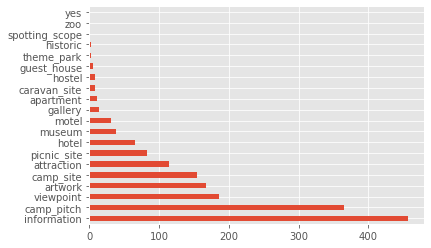

In [9]:
# the tourism column name seems to be the only useful column there isn't full of null's
tourist_attractions_sd_county_sdef["tourism"].value_counts().plot(kind="barh")

* Several things we can still look at in terms of the tourism feature column:
    * Get hospitality-related places like guest_house, hostel, motel, and hotel. These certainly aren't tourist attractions and more like the places that tourists stay at. Not sure well it would be included in this dataset, but still useful because we can assume that if these places exist, there should be no reason to have demand for Airbnb's nearby.
    * Camping or Nature-related places like camp-sites, camp-pitches. If people are camping, there's little reason to stay at a airbnb, assuming they could even be found in the wilderness

In [10]:
# cut down on useless column names
selected_tourist_attractions_sd_county_column_names = [
    "FID","OBJECTID","tourism","osm_id2","ZIP","Shape__Are","SHAPE"
]

cleaned_tourist_attractions_sd_county_sdef = tourist_attractions_sd_county_sdef[
    selected_tourist_attractions_sd_county_column_names]

## Geo-enrichment of the zipcodes

In [11]:
import arcgis.geoenrichment as geoenrich
countries = geoenrich.get_countries()
usa = geoenrich.Country.get('US')

#print(list(usa.data_collections.index.unique()))

geoenrich_df = usa.data_collections#.commute
geoenrich_df = geoenrich_df.reset_index(drop=False)

In [12]:
businesses_sic_column_names = ["s01_bus","s16_bus","s24_bus","s26_bus",]
businesses_naics_column_names = ["n01_bus","n13_bus","n15_bus","n16_bus","n34_bus","n35_bus","n36_bus","n37_bus"]
industry_column_names = ["emp_cy","indarts_cy","indfood_cy"]
crime_column_names = ['crmcytotc']
presenceofchildren_column_names = ['hwfu18_o10','hwfu6_o10']
homevalue_column_names = ['medval_cy','avgval_cy','medval_fy','avgval_fy','acsmedval']#,'acsavgval']
householdincome_column_names = ['medhinc_cy','avghinc_cy','pci_cy','mhigrwcyfy','acsavghinc']
disposableincome_column_names = ['meddi_cy','avgdi_cy']
population_column_names = ['acstotpop']

selected_column_names = ['ZIP']
selected_column_names += businesses_sic_column_names
selected_column_names += businesses_naics_column_names
selected_column_names += industry_column_names
selected_column_names += crime_column_names
selected_column_names += presenceofchildren_column_names
selected_column_names += homevalue_column_names
selected_column_names += householdincome_column_names
selected_column_names += disposableincome_column_names
selected_column_names += population_column_names

zip_geoenriched_column_names = selected_column_names[1:]
def normalize_columns(df, column_names, replace=True):
    # make sure the first column name of the arg column_names is the divisor a.k.a normalizer
    normalizer_column_name = column_names[0] 
    to_be_normalized_column_names = column_names[1:]
    
    to_be_normalized_columns = df[to_be_normalized_column_names]
    normalizer_column = df[normalizer_column_name]+0.0001
    
    normalized_columns = to_be_normalized_columns.values / np.expand_dims(normalizer_column.values,1)
    if replace==True:
        # replaces the old, pre-normalized columns
        df[to_be_normalized_column_names] = normalized_columns
    else:
        new_normalized_column_names = [x+"/"+normalizer_column_name for x in to_be_normalized_column_names]
        df[new_normalized_column_names] = normalized_columns
    return df

def add_population_density_column(df,
    population_density_column_name = "popdensity",
    population_column_name = "acstotpop",
    area_column_name = "Shape__Are",
                                 ):
    # adding population density column
    population_column = df[population_column_name]
    area_column = df[area_column_name]
    zero_div_prevention = 1
    factor = 100000
    population_density_column = (population_column/(area_column+zero_div_prevention))*factor
    df[population_density_column_name] = population_density_column
    return df

def data_clean_enriched_zipcode_df(enriched_zipcode_df):

    # step 1: removing unnecessary columns
    businesses_sic_column_names = ["s01_bus","s16_bus","s24_bus","s26_bus",]
    businesses_naics_column_names = ["n01_bus","n13_bus","n15_bus","n16_bus","n34_bus","n35_bus","n36_bus","n37_bus"]
    industry_column_names = ["emp_cy","indarts_cy","indfood_cy"]
    crime_column_names = ['crmcytotc']
    presenceofchildren_column_names = ['hwfu18_o10','hwfu6_o10']
    homevalue_column_names = ['medval_cy','avgval_cy','medval_fy','avgval_fy','acsmedval']#,'acsavgval']
    householdincome_column_names = ['medhinc_cy','avghinc_cy','pci_cy','mhigrwcyfy','acsavghinc']
    disposableincome_column_names = ['meddi_cy','avgdi_cy']
    population_column_names = ['acstotpop']

    selected_column_names = ['ZIP']
    selected_column_names += businesses_sic_column_names
    selected_column_names += businesses_naics_column_names
    selected_column_names += industry_column_names
    selected_column_names += crime_column_names
    selected_column_names += presenceofchildren_column_names
    selected_column_names += homevalue_column_names
    selected_column_names += householdincome_column_names
    selected_column_names += disposableincome_column_names
    selected_column_names += population_column_names
    cleaned_enriched_zipcode_df = enriched_zipcode_df[selected_column_names]

    # step 2: normalizing certain columns
    #cleaned_enriched_zipcode_df = normalize_columns(cleaned_enriched_zipcode_df,industry_column_names)
    #cleaned_enriched_zipcode_df = normalize_columns(cleaned_enriched_zipcode_df,businesses_sic_column_names)
    #cleaned_enriched_zipcode_df = normalize_columns(cleaned_enriched_zipcode_df,businesses_naics_column_names)
    #cleaned_enriched_zipcode_df = normalize_columns(cleaned_enriched_zipcode_df,population_column_names+crime_column_names)

    # step 3: adding column for growth rate of median home values
    cleaned_enriched_zipcode_df[homevalue_column_names]
    projected_future_median_home_value_column_name = "medval_fy"
    projected_future_median_home_value_column = cleaned_enriched_zipcode_df[projected_future_median_home_value_column_name]

    current_2022_median_home_value_column_name = "medval_cy"
    current_2022_median_home_value_column = cleaned_enriched_zipcode_df[current_2022_median_home_value_column_name]
    
    past_2021_median_home_value_column_name = "acsmedval"
    past_2021_median_home_value_column = cleaned_enriched_zipcode_df[past_2021_median_home_value_column_name]
    
    # projected growth rate between 2022 and 2027
    median_home_value_growth_rate_future_column_name = "medvalgrfy"
    median_home_value_growth_rate_future_column = (
        (projected_future_median_home_value_column - current_2022_median_home_value_column)/(current_2022_median_home_value_column+1)
    )
    cleaned_enriched_zipcode_df[median_home_value_growth_rate_future_column_name] = median_home_value_growth_rate_future_column

    # observed growth rate between 2022 and 2021
    median_home_value_growth_rate_past_column_name = "medvalgrcy"
    median_home_value_growth_rate_past_column = (
        (current_2022_median_home_value_column - past_2021_median_home_value_column)/(past_2021_median_home_value_column+1)
    )
    cleaned_enriched_zipcode_df[median_home_value_growth_rate_past_column_name] = median_home_value_growth_rate_past_column
    
    # step 4: adding income inequality columns
    # Disparity between avg and median household income
    household_income_avg_med_disparity_column_name = "havgmeddis"
    household_income_avg_column_name = "avghinc_cy"
    household_income_med_column_name = "medhinc_cy"
    household_income_avg_column = cleaned_enriched_zipcode_df[household_income_avg_column_name]
    household_income_med_column = cleaned_enriched_zipcode_df[household_income_med_column_name]
    household_income_avg_med_disparity_column = (household_income_avg_column/(household_income_med_column+1))
    cleaned_enriched_zipcode_df[household_income_avg_med_disparity_column_name] = household_income_avg_med_disparity_column
    
    # Disparity between avg and median disposable income
    disposable_income_avg_med_disparity_column_name = "davgmeddis"
    disposable_income_avg_column_name = "avgdi_cy"
    disposable_income_med_column_name = "meddi_cy"
    disposable_income_avg_column = cleaned_enriched_zipcode_df[disposable_income_avg_column_name]
    disposable_income_med_column = cleaned_enriched_zipcode_df[disposable_income_med_column_name]
    disposable_income_avg_med_disparity_column = (disposable_income_avg_column/(disposable_income_med_column+1))
    cleaned_enriched_zipcode_df[disposable_income_avg_med_disparity_column_name] = disposable_income_avg_med_disparity_column

    return cleaned_enriched_zipcode_df

In [13]:
import tqdm 

enrich_data_collections = [
    'businesses',
    'industry',
    'crime',
    'presenceofchildren',
    'homevalue',
    'householdincome',
    'disposableincome',
    'population',
]
unique_sd_county_zipcodes = list(pd.unique(san_diego_county_zipcodes_sdef["ZIP"]))
enriched_first_time = False
if enriched_first_time == True:
    
    pd_concat_list = []
    for zipcode in tqdm.tqdm(unique_sd_county_zipcodes):
        #print(zipcode)
        temp_result = geoenrich.enrich(study_areas=["San Diego County CA "+str(zipcode)], 
                                       data_collections = enrich_data_collections)
        pd_concat_list.append(temp_result)
    concat_df = pd.concat(pd_concat_list,axis=0)
    concat_df = pd.concat([pd.DataFrame(unique_sd_county_zipcodes,columns=["ZIP"]), 
                           concat_df.reset_index(drop=True)],axis=1)
    enriched_zipcode_df = concat_df
    enriched_zipcode_df.to_csv("enriched_zipcode_df.csv",index=False)
    #
    enriched_zipcode_df = pd.read_csv("enriched_zipcode_df.csv")
    cleaned_enriched_zipcode_df = data_clean_enriched_zipcode_df(enriched_zipcode_df)
    #cleaned_enriched_zipcode_df.to_csv("cleaned_enriched_zipcode_df.csv",index=False)
    #cleaned_enriched_zipcode_df = pd.read_csv("cleaned_enriched_zipcode_df.csv")
    
    cleaned_enriched_zipcodes_sd_county_sdef = san_diego_county_zipcodes_sdef.merge(
        cleaned_enriched_zipcode_df,on=["ZIP"],
    )
    cleaned_enriched_zipcodes_sd_county_item = cleaned_enriched_zipcodes_sd_county_sdef.spatial.to_featurelayer(
            "cleaned_enriched_zipcodes_sd_county_sdef_ttbd_v1",gis=gis)
    cleaned_enriched_zipcodes_sd_county_item.share(org=True)


else:
    cleaned_enriched_zipcodes_sd_county_item = gis.content.get("8f94e37ac5144ef580ce889833016d38")

cleaned_enriched_zipcodes_sd_county_flayer = cleaned_enriched_zipcodes_sd_county_item.layers[0]
cleaned_enriched_zipcodes_sd_county_fset = cleaned_enriched_zipcodes_sd_county_flayer.query()
cleaned_enriched_zipcodes_sd_county_sdef = cleaned_enriched_zipcodes_sd_county_fset.sdf

### Adding Airbnb Listings Points Layer to Geoenriched Zipcodes with Aggregate_Points

In [14]:
field_listings_column_names = [column_name+" Mean" for column_name in selected_listings_column_names[1:]]
zip_listings_eq_summary = summarize_data.aggregate_points(point_layer = listings_orig_flayer,
                                            polygon_layer = san_diego_county_zipcodes_flayer,
                                            keep_boundaries_with_no_points=True,
                                            summary_fields=field_listings_column_names)
zip_listings_eq_summary_flayer = zip_listings_eq_summary["aggregated_layer"]
zip_listings_eq_summary_fset = zip_listings_eq_summary_flayer.query()
zip_listings_eq_summary_sdef = zip_listings_eq_summary_fset.sdf

selected_zip_listings_eq_summary_sdef = zip_listings_eq_summary_sdef[
    ["ZIP","Point_Count"]+["mean_"+column_name for column_name in selected_listings_column_names[1:]]]

selected_zip_listings_eq_summary_sdef.rename(columns={"Point_Count":"numlisting"},inplace=True)
selected_zip_listings_eq_summary_sdef = selected_zip_listings_eq_summary_sdef.drop_duplicates()
selected_zip_listings_eq_summary_sdef = selected_zip_listings_eq_summary_sdef.fillna(0)

print(cleaned_enriched_zipcodes_sd_county_sdef.shape[0])
print(selected_zip_listings_eq_summary_sdef.shape[0])

cleaned_enriched_zipcodes_sd_county_sdef = cleaned_enriched_zipcodes_sd_county_sdef.merge(
    selected_zip_listings_eq_summary_sdef,on=["ZIP"],how="left"
)
print(cleaned_enriched_zipcodes_sd_county_sdef.shape[0])

{"cost": 12.904}


107
114
109


In [15]:
zip_listings_agg_points_column_names = ["mean_"+c for c in selected_listings_column_names[1:]] + ['numlisting']

In [16]:
def impute_columns(temp_sdef,impute_func=np.median):
    temp_column_names = list(temp_sdef.columns)
    for column_name in temp_column_names:
        temp_column = temp_sdef[column_name]
        temp_column_imputer = impute_func(temp_column.fillna(0))
        temp_sdef[column_name] = temp_column.fillna(temp_column_imputer)
    return temp_sdef

In [17]:
cleaned_enriched_zipcodes_sd_county_sdef_orig = cleaned_enriched_zipcodes_sd_county_sdef.copy()
cleaned_enriched_zipcodes_sd_county_sdef = cleaned_enriched_zipcodes_sd_county_sdef.set_index(
    cleaned_enriched_zipcodes_sd_county_sdef["ZIP"])
cleaned_enriched_zipcodes_sd_county_sdef = cleaned_enriched_zipcodes_sd_county_sdef.drop(
    columns=['FID', 'ZIP', 'COMMUNITY', 'SHAPE_STAr', 'SHAPE_STLe', 'Shape__Length', 'SHAPE'])
# by now after dropping these columns, all of the remaining columns should be numerical
print(cleaned_enriched_zipcodes_sd_county_sdef_orig.shape) # 109

(109, 60)


In [18]:
# impute the columns
cleaned_enriched_zipcodes_sd_county_sdef = impute_columns(cleaned_enriched_zipcodes_sd_county_sdef)
print(cleaned_enriched_zipcodes_sd_county_sdef.shape) # 109

(109, 53)


### Adding New, Self-Derived Columns to Geoenriched Zipcodes
* Log-transforming columns
* Normalizing columns by Zipcode Population or Zipcode Area

In [19]:
zip_loggable_numerical_column_names = ["Shape__Area"]
zip_loggable_numerical_column_names += zip_geoenriched_column_names
zip_loggable_numerical_column_names += zip_listings_agg_points_column_names
zip_post_logged_column_names = []
# make a logged version of each of the numerical columns
for column_name in zip_loggable_numerical_column_names:
    temp_column = cleaned_enriched_zipcodes_sd_county_sdef[column_name]
    logged_column_name = "LOG({0})".format(column_name)
    zip_post_logged_column_names.append(logged_column_name)
    cleaned_enriched_zipcodes_sd_county_sdef[logged_column_name] = np.log1p(temp_column)

print(cleaned_enriched_zipcodes_sd_county_sdef.shape) # 109

(109, 99)


In [20]:
# add a population density column or "acstotpop" / "LOG(Shape__Area)"
# the logged version of Shape__Area is being used instead because it is more bell-shaped and normally distributed
# as well as scale it down more
cleaned_enriched_zipcodes_sd_county_sdef = add_population_density_column(
    cleaned_enriched_zipcodes_sd_county_sdef,area_column_name = "LOG(Shape__Area)")

print(cleaned_enriched_zipcodes_sd_county_sdef.shape) # 109

(109, 100)


In [21]:
# find column names that need to be normalized by population 
# (which should be the ones being too correlated with it, specifically with an r2 >= 50%)
# binarizing the columns before doing the correlation will be able to capture more of these columns
# and binarizing will be done by seeing if each column is >= their respective column-wise median

population_column_name = "acstotpop"
cleaned_enriched_zipcodes_sd_county_sdef_binarized = (
    cleaned_enriched_zipcodes_sd_county_sdef >= np.median(cleaned_enriched_zipcodes_sd_county_sdef.values,axis=0,keepdims=1)
)
cleaned_enriched_zipcodes_sd_county_sdef_binarized_corr = cleaned_enriched_zipcodes_sd_county_sdef_binarized.corr()
result = ((cleaned_enriched_zipcodes_sd_county_sdef_binarized_corr[population_column_name]
          .apply(np.abs)
          .sort_values(ascending=False)) >= 0.5)
overly_popu_correlated_column_names = list(result[result == True][1:].index)
# a list of the column names overly correlated with population

# then add new, population-normalized versions of these columns to the df
cleaned_enriched_zipcodes_sd_county_sdef = normalize_columns(cleaned_enriched_zipcodes_sd_county_sdef, 
                                                             [population_column_name]+overly_popu_correlated_column_names,
                                                             replace=False)
print(cleaned_enriched_zipcodes_sd_county_sdef.shape) # 109

(109, 114)


In [22]:
# get columns that would be helpful to be normalized by area

# unlike population, its probably better to manually add which columns we want to normalize by area
# also unlike population, i decided not to binarize beforehand (idk, maybe we should?) 
area_normalizable_column_names = []
area_normalizable_column_names += ["numlisting"] # number of airbnbs within the zipcode

businesses_column_names = businesses_naics_column_names + businesses_sic_column_names
area_normalizable_column_names += businesses_column_names # number of businesses of diff types within the area

# maybe also include the logged versions of these column names?
area_normalizable_column_names += ["LOG({0})".format(c) for c in area_normalizable_column_names]

area_column_name = "LOG(Shape__Area)" # remember that the logged version of shape area is better

# then add new, area-normalized versions of these columns to the df
cleaned_enriched_zipcodes_sd_county_sdef = normalize_columns(cleaned_enriched_zipcodes_sd_county_sdef, 
                                                             [area_column_name]+area_normalizable_column_names,
                                                             replace=False)
print(cleaned_enriched_zipcodes_sd_county_sdef.shape) # 109

(109, 140)


In [23]:
# final task is to get the correlations between the SD county zipcode's avg airbnb price and the other columns in the table
# then get the attributes with the highest correlation, then do a choropleth of the zipcodes with said attribute,
# along with a map of the airbnb points over it, colored by their individual prices

final_cleaned_enriched_zipcodes_sd_county_sdef = cleaned_enriched_zipcodes_sd_county_sdef.copy()

zip_sd_city_sdef = san_diego_county_zipcodes_sdef[["ZIP","SHAPE"]].spatial.join(
    listings_sdef[["SHAPE"]]).drop_duplicates(subset=["ZIP"])
zip_sd_county_sdef = san_diego_county_zipcodes_sdef[["ZIP","SHAPE"]].drop_duplicates(subset=["ZIP"])

# if zip_shapes_sdef is set to zip_sd_county_sdef, then the maps will look at all zipcodes in SD county
# if zip_shapes_sdef is set to zip_sd_city_sdef, then the maps will only look at zipcodes in SD city

#zip_shapes_sdef = zip_sd_county_sdef
zip_shapes_sdef = zip_sd_city_sdef


final_cleaned_enriched_zipcodes_sd_county_sdef.reset_index(drop=False).drop_duplicates(subset=["ZIP"])


geo_final_zip_sd_sdef = zip_shapes_sdef.merge(
    final_cleaned_enriched_zipcodes_sd_county_sdef.reset_index(drop=False).drop_duplicates(subset=["ZIP"]),
    on=["ZIP"])

# Part 8: Descriptive Statistics

Text(0.5, 0.98, 'Distribution of Zipcode Avg Airbnb price')

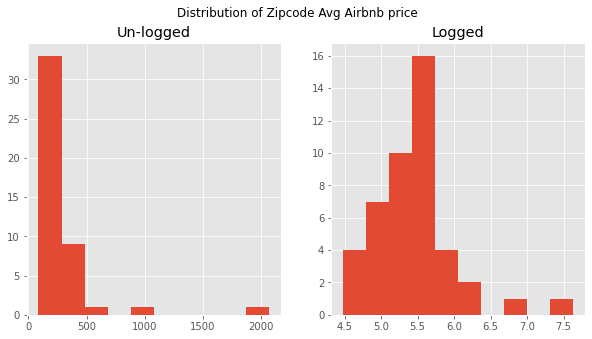

In [24]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
_ = axs[0].hist(geo_final_zip_sd_sdef["mean_price"])
axs[0].set_title("Un-logged")
_ = axs[1].hist(geo_final_zip_sd_sdef["LOG(mean_price)"])
axs[1].set_title("Logged")
fig.suptitle("Distribution of Zipcode Avg Airbnb price")

In [25]:
def label_percentiles(percentiles, num):
    for i, value in enumerate(percentiles, 1):
        if num<=value:
            return i
    return i+1


# Making Price into quartiles
geo_final_zip_sd_sdef_temp = geo_final_zip_sd_sdef.copy()

price_quartiles = np.percentile(geo_final_zip_sd_sdef_temp["mean_price"], [25, 50, 75])
geo_final_zip_sd_sdef_temp["price_quartile"] = (
    geo_final_zip_sd_sdef_temp["mean_price"].apply(lambda x: label_percentiles(price_quartiles, x))
)
map_desc_stats_zipcode_price = gis.map()
geo_final_zip_sd_sdef_temp.spatial.plot(
    map_widget = map_desc_stats_zipcode_price,
    renderer_type='c', # for class breaks renderer
    method='esriClassifyNaturalBreaks', # classification algorithm
    class_count=4, # choose the number of classes
    col="price_quartile", # numeric column to classify
    alpha=0.8,
    cmap='cool',
    #markersize=1,
)
map_desc_stats_zipcode_price.legend=True
map_desc_stats_zipcode_price

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [26]:
popden_quartiles = np.percentile(geo_final_zip_sd_sdef_temp["popdensity"], [25, 50, 75])
geo_final_zip_sd_sdef_temp["popden_quartile"] = (
    geo_final_zip_sd_sdef_temp["popdensity"].apply(lambda x: label_percentiles(popden_quartiles, x))
)
map_desc_stats_popden = gis.map()
geo_final_zip_sd_sdef_temp.spatial.plot(
    map_widget = map_desc_stats_popden,
    renderer_type='c', # for class breaks renderer
    method='esriClassifyNaturalBreaks', # classification algorithm
    class_count=4, # choose the number of classes
    col="popden_quartile", # numeric column to classify
    alpha=0.8,
    cmap='cool',
    #markersize=1,
)
map_desc_stats_popden.legend=True
map_desc_stats_popden

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [27]:
pop_quartiles = np.percentile(geo_final_zip_sd_sdef_temp["acstotpop"], [25, 50, 75])
geo_final_zip_sd_sdef_temp["pop_quartile"] = (
    geo_final_zip_sd_sdef_temp["acstotpop"].apply(lambda x: label_percentiles(pop_quartiles, x))
)
map_desc_stats_pop = gis.map()
geo_final_zip_sd_sdef_temp.spatial.plot(
    map_widget = map_desc_stats_pop,
    renderer_type='c', # for class breaks renderer
    method='esriClassifyNaturalBreaks', # classification algorithm
    class_count=4, # choose the number of classes
    col="pop_quartile", # numeric column to classify
    alpha=0.8,
    cmap='cool',
    #markersize=1,
)
map_desc_stats_pop.legend=True
map_desc_stats_pop

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [28]:
geo_final_zip_sd_sdef_corr = geo_final_zip_sd_sdef.corr()
temp_corr = geo_final_zip_sd_sdef_corr
result = temp_corr["mean_price"].apply(np.log1p).apply(np.abs).sort_values(ascending=False)
result.head(50)

mean_price              0.693147
mean_accommodat         0.623114
LOG(mean_price)         0.620917
LOG(mean_accommodat)    0.516214
Shape__Are              0.494736
Shape__Area             0.494736
LOG(mean_reviews_pe)    0.384740
mean_reviews_pe         0.365756
Shape__Len              0.350341
LOG(numlisting)         0.246272
medval_fy               0.231928
LOG(Shape__Area)        0.225490
acsmedval               0.224234
avgval_fy               0.213271
medval_cy               0.213258
medvalgrcy              0.208239
LOG(medval_fy)          0.201290
avgval_cy               0.189314
LOG(avgval_fy)          0.181088
LOG(acsmedval)          0.178666
mhigrwcyfy              0.168725
LOG(mean_host_total)    0.158628
LOG(medval_cy)          0.158555
mean_host_accep         0.149606
FID_1                   0.139548
pci_cy                  0.139162
index_right             0.137590
havgmeddis              0.129279
LOG(avgval_cy)          0.127988
LOG(mhigrwcyfy)         0.126974
mean_revie

### Analysis of Contigency Tables against Zipcode Avg Price
* In the descriptive statistics section, a bunch of plots were made showing the relationship of many different variables with respect to the zipcodes' average airbnb price.
* These variables were specifically those among the top 50 highest absolute value of correlation coefficient to the zipcodes' average airbnb price. A lot of them however, had correlations far below 50%, so making a scatterplot wouldn't truly reveal any visible correlation lines, so instead, the features were binarized with a median threshold (into high vs low), and a contigency table would be made.

In [29]:
import seaborn as sns
def temp_build_contigency_table(df, column_name_1, column_name_2):
    
    binary_to_high_low_labeler = lambda x: ["Low", "High"][x]
    # lambda converts 0 to low and 1 to high
    
    column_1 = df[column_name_1].apply(np.log1p)
    column_1_median = np.median(column_1)
    column_1 = (column_1 >= column_1_median).astype(int) # binarizes the column by a median threshold
    column_1 = column_1.apply(binary_to_high_low_labeler) # converts binary labels to high vs low
    column_1 = column_1 + " " + column_name_1
    
    column_2 = df[column_name_2]
    column_2_median = np.median(column_2) 
    column_2 = (column_2 >= column_2_median).astype(int) # binarizes the column by a median threshold
    column_2 = column_2.apply(binary_to_high_low_labeler) # converts binary labels to high vs low
    column_2 = column_2 + " " + column_name_2
    
    result = pd.crosstab(column_1,column_2) # build 2x2 high vs low contigency table
    result.index.name= ""
    result.columns.name= ""
    return result
    
def plot_contigency_tables_for_mean_price(column_name, column_name_in_title):
    result = temp_build_contigency_table(geo_final_zip_sd_sdef, "mean_price",column_name)
    (
    sns.heatmap(result, annot=True)
        .set(title="Contigency Table between\nZipcode Avg Airbnb Price (mean_price) & \nZipcode {0} ({1})"
             .format(column_name_in_title,column_name))
    )
    plt.show()

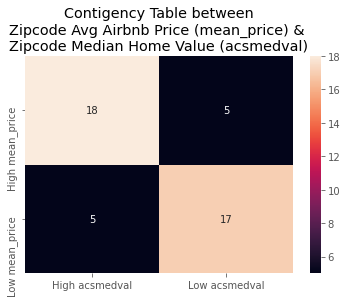

In [30]:
plot_contigency_tables_for_mean_price("acsmedval","Median Home Value")

 * This contigency table between Airbnb Price and Median Home Value show a **direct** relationship between the 2 variables. Zipcodes with high median Home Value are correlated with high avg Airbnb Price, and vice versa.

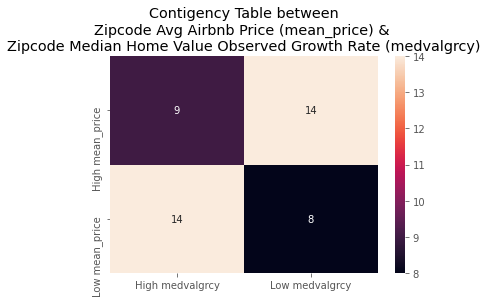

In [31]:
plot_contigency_tables_for_mean_price("medvalgrcy","Median Home Value Observed Growth Rate")

* The contigency table between Airbnb Price and Median Home Value Observed Growth Rate show an **inverse** relationship between the 2 variables. Zipcodes with low observed growth rates in median home values between 2021 and 2022 are correlated with high avg Airbnb Price, and vice versa.


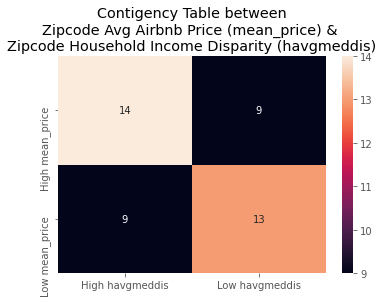

In [32]:
plot_contigency_tables_for_mean_price("havgmeddis","Household Income Disparity")

* The contigency table between Airbnb Price and Household Income Discrepancy show a **direct** relationship between the 2 variables. Zipcodes with high household income disparity are correlated with high avg Airbnb Price, and vice versa.


* These findings require further data sources that might only be possible for future analysis, to see if there is any markers of **gentrification** with airbnb's in a zipcode

<AxesSubplot:title={'center':'San Diego Tourist Attraction Types by Count'}>

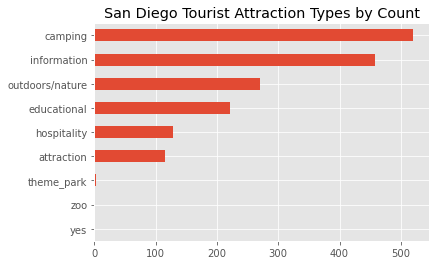

In [33]:
def get_tourism_type(x):
    # groups up the tourism labels into types
    if x in ["motel","hotel","hostel","apartment","guest_house","caravan_site"]:
        return "hospitality"
    elif x in ["viewpoint","spotting_scope","picnic_site"]: return "outdoors/nature";
    elif x in ["camp_pitch","camp_site"]: return "camping";
    elif x in ["museum","gallery","historic","artwork"]:
        return "educational"
    else:
        return x

fig, ax = plt.subplots()
ax.set_title("San Diego Tourist Attraction Types by Count")

tourism_type_column = tourist_attractions_sd_county_sdef["tourism"].apply(get_tourism_type)

tourism_type_column.value_counts()[::-1].plot(kind="barh",ax=ax)

In [34]:
tourist_attractions_sd_county_sdef_temp = tourist_attractions_sd_county_sdef.copy()
tourist_attractions_sd_county_sdef_temp["tourism_type"] = tourism_type_column
map_desc_stats_tourism_type = gis.map()
tourist_attractions_sd_county_sdef_temp.spatial.plot(
    map_widget = map_desc_stats_tourism_type,
    renderer_type='u', # for class breaks renderer
    class_count=7,
    col="tourism_type", # numeric column to classify
    alpha=0.8,
    #cmap='prism',
    #markersize=1,
)
map_desc_stats_tourism_type.legend = True
map_desc_stats_tourism_type

MapView(layout=Layout(height='400px', width='100%'), legend=True)

# Part 9: Data Analysis

## Analysis  

1. Explore Airbnb Price versus spatial factors using geoenriched data from each zip code
 - Movie/Amusement Businesses vs Airbnb Listing Price
 - Median Home Value vs Airbnb Price
 - Hotel/Lodging Businesses vs Airbnb Price
 - Industry: Arts/Entertainment/Rec vs Airbnb Price
2. Look at how the Airbnb price changes as it moves further away from San Diego Convention center, San Diego Zoo, and Sea World
3. Explore Airbnb Price versus non-spatial factors
 - Accommodates vs Listing Price
 - 30 Day Availability vs Listing Price
 - Rating vs Listing Price
 - Number of Reviews vs Listing Price
4. Listing Price Prediction Model

Our actual analysis steps were different compared to our project proposal because we took a bigger focus on neighborhood factors that affect the Airbnb rather than spatial features of the Airbnb such as parking in the area and walkability of the Airbnb. We chose to focus on neighborhood factors because it isn't only affecting a certain type of Airbnb consumer. For example, some consumers may not care about the walkability of an Airbnb because they have a car and don't mind driving.

## Data Analysis - Part 1: Airbnb Price Scatterplot against Several Zipcode Choropleth

In [35]:
listings_airbnb = listings_sdef.copy()
geoenriched_areas = geo_final_zip_sd_sdef.copy()

In [36]:
# Making Price into quartiles
price_quartiles = np.percentile(listings_airbnb["price"], [25, 50, 75])
listings_airbnb["price_quartile"] = listings_airbnb["price"].apply(lambda x: label_percentiles(price_quartiles, x))

# Making s26_bus into quintiles 
s26_bus_quintiles = np.percentile(geoenriched_areas["s26_bus"], [20, 40, 60, 80])
geoenriched_areas["s26_quintiles"] = geoenriched_areas["s26_bus"].apply(lambda x: label_percentiles(s26_bus_quintiles, x))

# Making medval_cy into quintiles
medval_cy_quintiles = np.percentile(geoenriched_areas["medval_cy"], [20, 40, 60, 80])
geoenriched_areas["medval_quintiles"] = geoenriched_areas["medval_cy"].apply(lambda x: label_percentiles(medval_cy_quintiles, x))

# Making S24_BUS inyo quintiles
s24_bus_quintiles = np.percentile(geoenriched_areas["s24_bus"], [20, 40, 60, 80])
geoenriched_areas["s24_quintiles"] = geoenriched_areas["s24_bus"].apply(lambda x: label_percentiles(s24_bus_quintiles, x))

# Making indarts_cy into quintiles
indarts_cy_quintiles = np.percentile(geoenriched_areas["indarts_cy"], [20, 40, 60, 80])
geoenriched_areas["indarts_quintiles"] = geoenriched_areas["indarts_cy"].apply(lambda x: label_percentiles(indarts_cy_quintiles, x))

### Movie/Amusement Businesses  vs Airbnb Listing Price

We want to take a look at how Amusement businesses affect the Airbnb listing price because families are more likely to visit areas with amusements for the kids. For example, there are many families from out of town and state that will fly to amusements such as Disneyland. This is a bigger example of something that families will go out travel to, but there are many smaller examples such as Legoland or the Zoo that families will go out of town to visit.

In [37]:
# Choropleth of s26_bus, with airbnb points colored by pricing
#S26_BUS - 2022 Movie/Amusement Businesses (SIC) vs Airbnb Price
map2 = gis.map('San Diego')
geoenriched_areas.spatial.plot(
    map_widget = map2,
    renderer_type='c', # for class breaks renderer
    method='esriClassifyNaturalBreaks', # classification algorithm
    class_count=5, # choose the number of classes
    col="s26_quintiles", # numeric column to classify
    alpha=0.8,
    cmap='RdYlGn',
)
listings_airbnb.spatial.plot(
    map_widget = map2,
    renderer_type='c', # for class breaks renderer
    method='esriClassifyNaturalBreaks', # classification algorithm
    class_count=4, # choose the number of classes
    col="price_quartile", # numeric column to classify
    alpha=0.8,
    cmap='cool',
)
map2.legend=True
map2

MapView(layout=Layout(height='400px', width='100%'), legend=True)

While we thought there might be a correlation with these types of businesses and Airbnb listing prices, we do not believe that there is any correlation between the number of movie/amusement businesses in the area and the Airbnb pricing. We think that it is more likely for certain amusements to affect the Airbnb listing prices rather than just having a large amount in the area

### 2022 Median Home Value vs Airbnb Price

We want to take a look at the median home value in the area versus the Airbnb listing prices in the area because if investors are investing in areas where it cost more to buy a property, we would expect the Airbnb listing prices to be higher in the area because they have more expenses to take care of and they are putting more of their money at risk.

In [38]:
# Choropleth of medval_cy, with airbnb points colored by pricing
#MEDVAL_CY - 2022 Median Home Value vs Airbnb Price

map3 = gis.map('San Diego')
geoenriched_areas.spatial.plot(
    map_widget = map3,
    renderer_type='c', # for class breaks renderer
    method='esriClassifyNaturalBreaks', # classification algorithm
    class_count=5, # choose the number of classes
    col="medval_quintiles", # numeric column to classify
    alpha=0.8,
    cmap='RdYlGn',
)
listings_airbnb.spatial.plot(
    map_widget = map3,
    renderer_type='c', # for class breaks renderer
    method='esriClassifyNaturalBreaks', # classification algorithm
    class_count=4, # choose the number of classes
    col="price_quartile", # numeric column to classify
    alpha=0.8,
    cmap='cool',
)
map3.legend=True
map3

MapView(layout=Layout(height='400px', width='100%'), legend=True)

This map confirms our beliefs as we can see this effect heavily on the coast where home prices are more expensive than inland areas. This shows that areas with a higher median home value do correlate with the Airbnb listing prices in the area. The most likely cause of this is that they are putting more money out to invest and to make a profit, they will need to take more money in.

### 2022 Hotel/Lodging Businesses vs Airbnb Price

We want to take a look at the number of Hotel/Loding Businesses in an area vs the Airbnb listing price because Airbnb is also a lodging business. With a greater number of places for tourist to lodge in the area, there is more competition fighting to house tourist in the area and the prices should reflect that.


In [39]:
# Choropleth of s24_bus, with airbnb points colored by pricing
#S24_BUS - 2022 Hotel/Lodging Businesses (SIC) vs Airbnb Pricing

map4 = gis.map('San Diego')
geoenriched_areas.spatial.plot(
    map_widget = map4,
    renderer_type='c', # for class breaks renderer
    method='esriClassifyNaturalBreaks', # classification algorithm
    class_count=5, # choose the number of classes
    col="s24_quintiles", # numeric column to classify
    alpha=0.8,
    cmap='RdYlGn',
)
listings_airbnb.spatial.plot(
    map_widget = map4,
    renderer_type='c', # for class breaks renderer
    method='esriClassifyNaturalBreaks', # classification algorithm
    class_count=4, # choose the number of classes
    col="price_quartile", # numeric column to classify
    alpha=0.8,
    cmap='cool',
)
map4.legend=True
map4

MapView(layout=Layout(height='400px', width='100%'), legend=True)

We see that that there are areas that have high amount of lodging business also have high pricing for Airbnbs. This may be due to the fact that there is enough demand in the area that the prices can stay high even with a large amount of lodging businesses. In the areas with red which means that there are not much lodging businesses in the area, we can also see that those areas have high pricing such as in the 92127, 92129, 92130, which agrees with our hypothesis that areas with less lodging businesses can have Airbnbs that charge higher prices because of less competition

### 2022 Industry: Arts/Entertainment/Rec vs Airbnb Price

We want take a look at if a more heavy entertainment area has anything to do with the Airbnb pricing. Generally people like to stay in an area where they can get some entertainment when they travel such as downtown areas like the Gaslamp area in San Diego. We believe that those areas with more entertainment options may be more desireable areas for tourist.

In [40]:
# Choropleth of indarts_cy, with airbnb points colored by pricing
#INDARTS_CY - 2022 Industry: Arts/Entertainment/Rec vs Airbnb Pricing

map5 = gis.map('San Diego')
geoenriched_areas.spatial.plot(
    map_widget = map5,
    renderer_type='c', # for class breaks renderer
    method='esriClassifyNaturalBreaks', # classification algorithm
    class_count=5, # choose the number of classes
    col="indarts_quintiles", # numeric column to classify
    alpha=0.8,
    cmap='RdYlGn',
)
listings_airbnb.spatial.plot(
    map_widget = map5,
    renderer_type='c', # for class breaks renderer
    method='esriClassifyNaturalBreaks', # classification algorithm
    class_count=4, # choose the number of classes
    col="price_quartile", # numeric column to classify
    alpha=0.8,
    cmap='cool',
)
map5.legend=True
map5

MapView(layout=Layout(height='400px', width='100%'), legend=True)

We see that there is no correlation between the area being larger in the Arts/Entertainment/Rec industry and the Airbnb pricing for the area. We can see that there are not as many purple points in the green areas as compared to the yellow or red areas. The yellow and red areas are areas that have a smaller Arts/Entertainment/Rec industry than the green areas.

## Data Analysis - Part 2: Tourist Attraction Concentric Buffers

In [41]:
fid_comic_con = 1170
fid_zoo = 1150
#fid_legoland = 690
fid_seaworld = 61
selected_tourist_attractions_fids = [fid_comic_con,fid_zoo, fid_seaworld]

selected_tourist_attractions_sd_city_sdef = (
    tourist_attractions_sd_county_sdef[
        (tourist_attractions_sd_county_sdef["FID"].isin(selected_tourist_attractions_fids))
    ]
)
selected_tourist_attractions_points_sdef = selected_tourist_attractions_sd_city_sdef[["FID","SHAPE"]]

In [42]:
first_time = False
if first_time == True: 
    buffered_selected_tourist_attractions_item = create_buffers(
        selected_tourist_attractions_points_sdef,
        distances = [2,4,6,8],
        units="Miles",
        dissolve_type=None,
        ring_type="Rings",
        output_name="buffered_selected_tourist_attractions_ttbd_v5"
    )
    buffered_selected_tourist_attractions_item.share(org=True)
    print(buffered_selected_tourist_attractions_item.id)
else:
    #buffered_selected_tourist_attractions_item = gis.content.get("746942aeae5a40f998f508179182a932")
    #buffered_selected_tourist_attractions_item = gis.content.get("861f20bcfdea4721bfb802162ba49d36")
    #buffered_selected_tourist_attractions_item = gis.content.get("b2b538a2daf54fae92c2aa504ac1d4ef")
    buffered_selected_tourist_attractions_item = gis.content.get("4a25d72e2fd545cb9e3d084763285b8c")

In [43]:
buffered_selected_tourist_attractions_flayer = buffered_selected_tourist_attractions_item.layers[0]
buffered_selected_tourist_attractions_fset = buffered_selected_tourist_attractions_flayer.query()
buffered_selected_tourist_attractions_sdef = buffered_selected_tourist_attractions_fset.sdf
#listings_within_selected_tourist_attractions_sdef = (listings_sdef.spatial.join(buffered_selected_tourist_attractions_sdef))

In [44]:
from arcgis.features.manage_data import dissolve_boundaries
# using the dissolve argument of the create_buffers messes up the buff_dist, so we have to buffer then dissolve separately
first_time = False
if first_time == True: 
    dissolved_buffered_selected_tourist_attractions_item = dissolve_boundaries(buffered_selected_tourist_attractions_flayer,
                                   dissolve_fields=["BUFF_DIST"],                                         
                                   output_name='dissolved_buffered_selected_tourist_attractions_ttbd_v5')
    dissolved_buffered_selected_tourist_attractions_item.share(org=True)
    print(dissolved_buffered_selected_tourist_attractions_item.id)
else:
    dissolved_buffered_selected_tourist_attractions_item = gis.content.get("3631e0587a4a4d3f95cf52bb92eef4ff")

In [45]:
dissolved_buffered_selected_tourist_attractions_flayer = dissolved_buffered_selected_tourist_attractions_item.layers[0]
dissolved_buffered_selected_tourist_attractions_fset = dissolved_buffered_selected_tourist_attractions_flayer.query()
dissolved_buffered_selected_tourist_attractions_sdef = dissolved_buffered_selected_tourist_attractions_fset.sdf

In [46]:
map1 = gis.map()

listings_sdef.spatial.plot(
    map_widget = map1,
    class_count=2, # choose the number of classes
    alpha=0.001,
    col="BUFF_DIST"
)

dissolved_buffered_selected_tourist_attractions_sdef.spatial.plot(
    map_widget = map1,
    renderer_type='u', # for class breaks renderer
    method='quantile', # classification algorithm
    class_count=1, # choose the number of classes
    col="BUFF_DIST", # numeric column to classify
    alpha=0.2,
    cmap='autumn',
)
highest_prices_listings_sdef = listings_sdef.sort_values(["price"],ascending=False).head(1000)

highest_prices_listings_sdef.spatial.plot(
    map_widget = map1,
    renderer_type='c', # for class breaks renderer
    method='quantile', # classification algorithm
    class_count=2, # choose the number of classes
    col="price", # numeric column to classify
    alpha=0.8,
    cmap='cool',
)
map1

MapView(layout=Layout(height='400px', width='100%'))

* We decided to look at some concentric buffers around 3 specific, famous San Diego landmarks: 
    * SeaWorld, 
    * Convention Center, 
    * Balboa Park/the Zoo. 
* We have found that the airbnb's with the top 1000 highest prices tend to be within the closer buffer rings of these landmarks

## Data Analysis - Part 3: Non Spatial Factors

### Accomodates vs Listing Price

For the first non-spatial factor, we are looking at if a greater number of people that the home can accomodate correlates to a higher listing price. We believe that it will correlate because it means the home is a bigger size if it can accomodate more people.

In [91]:
listings_orig_df = listings_sdef

(0.0, 3000.0)

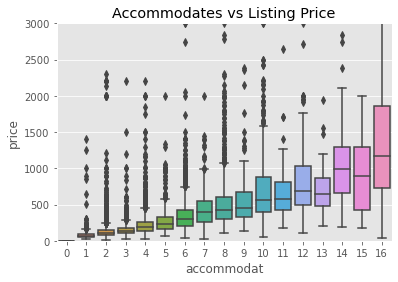

In [92]:
sns.boxplot(x=listings_orig_df["accommodat"], y=listings_orig_df["price"])
plt.title("Accommodates vs Listing Price")
plt.ylim(0, 3000)

When looking at how many people a Airbnb can accommodate versus the listing price, we can see a positive trend with price increasing as the number that it accommodates gets larger. This confirms our belief that the more it can accomodate, the more expensive the property is.

### 30 Day Availability  vs Listing Price

For the next non-spatial factor, we are looking at the 30 Day Availability vs Airbnb listing prices. We believe properties with less availability would be able to charge more because there is more demand for the property and properties with more availability would charge less to try to get someone into the property.

(62.0, 966.0)

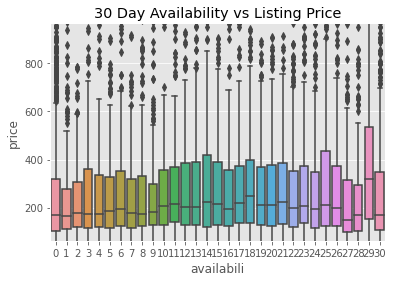

In [93]:
sns.boxplot(x=listings_orig_df["availabili"], y=listings_orig_df["price"])
plt.title("30 Day Availability vs Listing Price")
plt.ylim(np.percentile(listings_orig_df["price"],5), np.percentile(listings_orig_df["price"], 95))

Our beliefs were incorrect and it looks like the pricing stays relatively uniform between the availability and the price. This is suprising because we would expect properties with more availability to charge less to try and get the property filled rather than have no way and generate no income.

### Rating vs Listing Price

For the next non-spatial factor, we are looking the the rating of the property vs the Airbnb listing prices. We believe that properties with a higher rating would be able to charge more because Airbnb users would know that they would have a good experience over a property that they would be unsure about.

(60.0, 868.8999999999978)

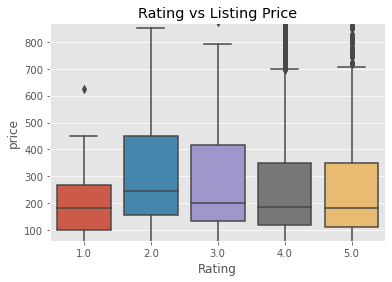

In [94]:
review_df = listings_orig_df[["review_s_6", "price"]].dropna()
sns.boxplot(x=review_df["review_s_6"].apply(np.floor), y=review_df["price"])
plt.xlabel("Rating")
plt.title("Rating vs Listing Price")
plt.ylim(np.percentile(review_df["price"],5), np.percentile(review_df["price"], 95))

While we believed that properties with a higher rating would be able to charge a premimum because consumers would know that they would get a good experience, that is not the case. It is suprising because properties with 2 or 3 starts charge more than properties with 4 or 5 stars. The properties with 1 start charge less than the rest.

### Number of Reviews vs Price

For the next non-spatial factor, we are looking at the number of reviews and the Airbnb listing price. We believe that those with a large amount of reviews would be likely to charge more because a lot of people are staying in the home for some reason which would make the property more desireable.

(62.0, 966.0)

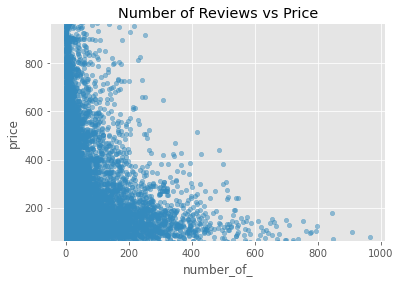

In [95]:
listings_orig_df.plot.scatter(x="number_of_", y="price", title="Number of Reviews vs Price",alpha=0.5)
plt.ylim(np.percentile(listings_orig_df["price"],5), np.percentile(listings_orig_df["price"], 95))

We believed that those with more reviews would be likely charging more as a place with more reviews are more desireable than those with less reviews. It doesn't look like that is the case as there are many at the lower end of reviews with a higher price

### Host Total Listings vs Price

For the last non-spatial factor, we are looking at the Host Total Listings vs Price. We believe that host with a greater number of total listings would be able to charge more for an Airbnb because it shows that they are experienced if they are managing many Airbnbs.

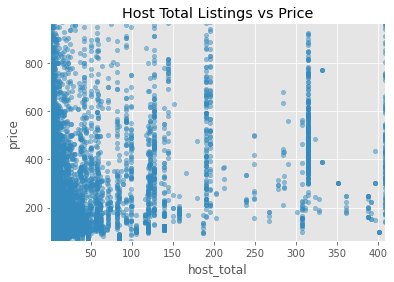

In [96]:
host_df = listings_orig_df[["host_total", "price"]].dropna()
host_df.plot.scatter(x="host_total", y="price", title="Host Total Listings vs Price",alpha=0.5)
plt.xlim(np.nanpercentile(host_df["host_total"], 5), np.nanpercentile(host_df["host_total"], 95))
plt.ylim(np.percentile(host_df["price"],5), np.percentile(host_df["price"], 95))
plt.show()

We can see that there is no correlation between the experience that a host has and the price that a property is listed at

## Data Analysis - Part 4: Listings Price Prediction Model

* A prediction model for regression will be done that predicts an airbnb's price, given its airbnb data and geo-enriched data about the zipcode it resides in

In [97]:
# cleaned_enriched_zipcodes_sd_county_sdef will be joined with listings_sdef,
# but first, all of the listings_sdef-derived feature used from aggregate_points must be dropped from 
# cleaned_enriched_zipcodes_sd_county_sdef, as well as its variations such as logging or normalization by population or area
full_zip_listings_agg_points_column_names = []
for i in list(cleaned_enriched_zipcodes_sd_county_sdef.columns):
    for j in zip_listings_agg_points_column_names:
        if j in i:
            full_zip_listings_agg_points_column_names.append(i)
geo_final_zip_sd_sdef_v1 = geo_final_zip_sd_sdef.drop(columns=full_zip_listings_agg_points_column_names)
geo_final_zip_sd_sdef_v1 = geo_final_zip_sd_sdef_v1.drop(columns=["index_right"])

In [98]:
zip_listings_agg_points_column_names

['mean_host_accep',
 'mean_host_total',
 'mean_accommodat',
 'mean_price',
 'mean_reviews_pe',
 'mean_number_of_',
 'mean_review_sco',
 'mean_review_s_1',
 'mean_review_s_2',
 'mean_review_s_3',
 'mean_review_s_4',
 'mean_review_s_5',
 'mean_review_s_6',
 'numlisting']

In [99]:
selected_geo_listings_sdef_column_names = [c[5:] for c in zip_listings_agg_points_column_names[:-1]] + ["SHAPE"] + ["id"]
# reducing the airbnb data with few selected, bare-minimum columns (to make the spatial join run faster)
listings_sdef_v1 = listings_sdef[selected_geo_listings_sdef_column_names]

# spatially joining the airbnb data with the enriched zipcode data
zipcode_enriched_listings_sdef = listings_sdef_v1.spatial.join(geo_final_zip_sd_sdef_v1)

CorrCoef is 0.79250836765025


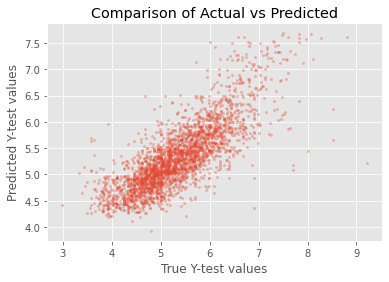

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

#model = DecisionTreeRegressor()
model = LinearRegression()

excluded_input_df_column_names = ["id","SHAPE"]
X = zipcode_enriched_listings_sdef.drop(columns=["price"]+excluded_input_df_column_names)
#for c in selected_listings_column_names:
#    if c in list(X.columns):
#        X.drop(columns=[c],inplace=True)

X = X.fillna(0)
y = zipcode_enriched_listings_sdef["price"].apply(np.log1p)
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model.fit(X_train, y_train)
model.score(X_test,y_test)

predictions = model.predict(X_test)
fig, axs = plt.subplots()
axs.scatter(y_test,predictions,alpha=0.33,s=5)
axs.set_xlabel("True Y-test values")
axs.set_ylabel("Predicted Y-test values")
axs.set_title("Comparison of Actual vs Predicted")
print("CorrCoef is", np.corrcoef(predictions,list(y_test.values))[0][1])

## Summary of Results

Our map visualizations and graph visualizations are in the analysis part with markdown explaining the findings of the visual.

To summarize our results, the biggest factors affecting pricing in a positive or negative trend are location and size.
In general, location and size are the biggest factors that affect the expenses of an investor because they have to pay more for a better location or a bigger home leading to a bigger mortgage each month or having to put more of their money out of pocket. The goal of an investor is to make a profit, so they would need to charge more if they have more expenses. When we look at the pricing of an Airbnb from tourist attractions, we can see that bigger tourist attractions do have an effect on the Airbnb pricing. If there are two properties of similar features near a large tourist attraction like the San Diego convention center but one is super close and one is further away, we would expect the closer one would be able to charge more. We also saw that homes that are able to accommodate more are able to charge more. Both of these findings are in line with our hypothesis.

There was one factor that the results were unique and interesting which was how the rating affected the price of an Airbnb. In our visual of Rating vs Listing Price, we were able to see that the higher ratings didn't correlate to higher pricing. It actually showed a lower pricing for higher ratings which follows the finding from one of the literature pieces above. 


<AxesSubplot:>

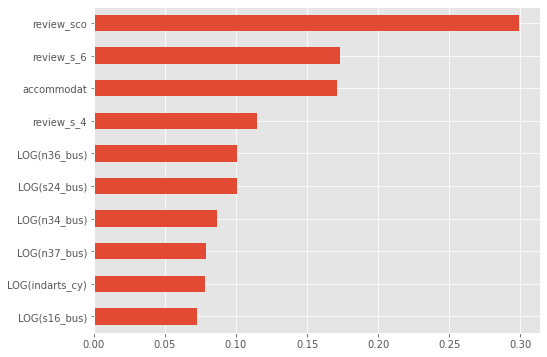

In [101]:
# getting the absolute values of each of the linreg model's coefficients and ranking them;
# the top 10 are shown.
fig, ax = plt.subplots(figsize=(8,6))
top_features = pd.Series(
    index=list(X.columns),
    data=np.abs(model.coef_)
).sort_values(ascending=False).head(10)[::-1]
top_features.plot(kind="barh",ax=ax)

* **Most Influential Features from the Linear Regression in predicting an Airbnb's price include**:
    * **review_sco** - the review score rating
    * **review_s_6** - the review_scores_value
    * **Accomodat** - the amount of people it can accomodate
    * **review_s_4** - the review_scores_communication
    * **Log(n34_bus)** - the amount of 2022 Arts/Entertainment/Rec Businesses (NAICS) in the zipcode (log-transformed) 
    * **Log(n36_bus)** - the amount of 2022 Accommodation Businesses (NAICS) in the zipcode (log-transformed)
    * **Log(n37_bus)** - the amount of 2022 Food and Drinking Businesses (NAICS) in the zipcode (log-transformed)
    * **Log(S24_BUS)** - the amount of 2022 Hotel/Lodging Businesses (SIC) in the zipcode (log-transformed)
    * **Log(emp_cy)** - the employed population in the zipcode (log-transformed) 
    * **Log(indarts_cy)** - the employed population in industry of arts, entertainment, and recreation in the zipcode (log-transformed) 
    * **Log(S16_BUS)** - the amount of 2022 Eating & Drinking Businesses (SIC) in the zipcode (log-transformed) 

In [102]:
temp_prediction_corr = zipcode_enriched_listings_sdef[(list(top_features.index)+["price"])]
temp_prediction_corr["price"] = np.log1p(temp_prediction_corr["price"])
temp_prediction_corr_medians = np.median(temp_prediction_corr.fillna(0).values,axis=0,keepdims=1)
#temp_prediction_corr = temp_prediction_corr > temp_prediction_corr_medians
temp_prediction_corr = (temp_prediction_corr).astype(float)

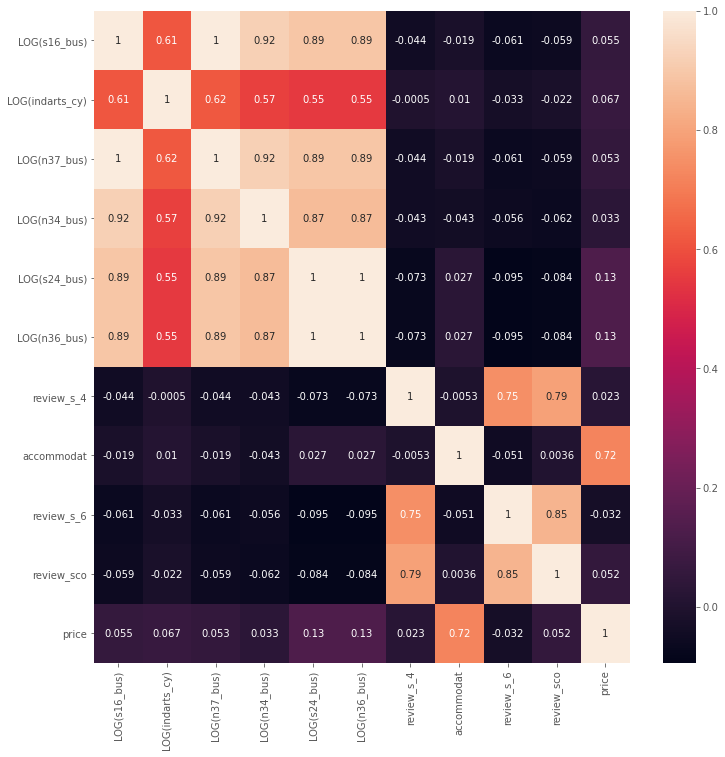

In [103]:
fig, axs = plt.subplots(figsize=(12,12))
sns.heatmap(temp_prediction_corr.corr(), annot=True);
#plt.show()

* There is a lot of multi-collinearity between the businesses columns

In [104]:
def plot_contigency_tables_for_price(column_name, column_name_in_title):
    result = temp_build_contigency_table(zipcode_enriched_listings_sdef, "price",column_name)
    (
    sns.heatmap(result, annot=True)
        .set(title="Contigency Table between\n Airbnb Price (price) & \n {0} ({1})"
             .format(column_name_in_title,column_name))
    )
    plt.show()

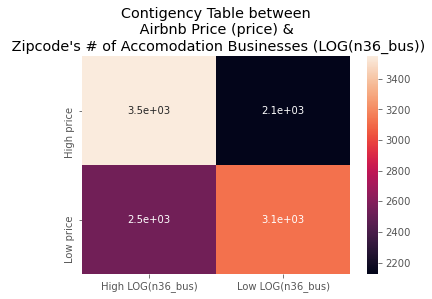

In [105]:
plot_contigency_tables_for_price("LOG(n36_bus)","Zipcode's # of Accomodation Businesses")

* There seems to be a direct relationship between the amount of accomodation businesses within the zipcodes and high airbnb pricing.

## Discussion

1. For the most part, our findings are in concurrence with the literature except for one point in the Padlifter article. We were not able to find that demand caused increases in pricing when looking at the 30 day availability vs listing price. We found that the price stayed nearly uniform. An interesting thing that we did find was that the listing reputation does affect the price. We can see a higher price distribution in 2 and 3 star reviews than 4 and 5 stars. The only exception are in the 1 star Airbnbs which has the lowest price distribution from all the other scores.   

2. One of the issues that we had to deal with is that mapping too many variables could cause the kernel to crash, so we had to figure out what maps best send the message of what we want the audience to see. Another trade-off that we had to deal with is limiting the area of the tourist attractions and Airbnb to a specific area because these datasets were huge and took a long time to load. We were afraid that they would crash the notebook if the area we did was too large. The last trade-off that we had was when deciding the buffer width. If we went too small of a buffered area, then the whole map would look very busy and hard to see especially because we had a lot of other points on the map also.

## Conclusions and Future Work

To conclude, we did answer our initial research question of what spatial and non-spatial factors affect the listing price of an Airbnb listing, but we weren’t able to answer it completely. It is difficult to completely answer a question like this because it is more open-ended and there are many factors that can contribute to the price of Airbnb listings and it would be difficult to understand every single factor. With our project, we looked at the factors that are most likely to be the biggest contributor to the Airbnb listing price and we found that the biggest contributors are related to location, size, and previous experiences with the property. I think an additional analysis step that we can do is to look at the relationship between property expenses for investors versus the listing price of an Airbnb to understand if people are being fairly charged to stay at a property or if there are other factors beyond the expenses that investors incur that gauge the price of the Airbnb listing. I believe that this approach can be extended to other areas such as long-term rentals or commercial real estate instead of just short-term rentals because all of these are affected by similar market forces that affect the expenses of a property. I believe that the biggest contributor to the rental price of any sort of property has to do with the upkeep expenses of a property because investors are wanting to grow their money, so it would not make sense to price a rental below the cost it takes to upkeep a property. I expect the results to be used by Airbnb investors to see what areas are fit for them to invest in. For example, if there are looking for a nicer and pricer area with high Airbnb listing prices, they might look at an area near the coast.
